# 2.8 Итоговое задание
Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 

### Описание датасета
1 school — аббревиатура школы, в которой учится ученик  
2 sex — пол ученика ('F' - женский, 'M' - мужской)  
3 age — возраст ученика (от 15 до 22)  
4 address — тип адреса ученика ('U' - городской, 'R' - за городом)  
5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)  
6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)  
7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)  
8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)  
9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)  
10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)  
11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)  
12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)  
13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)  
14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)  
15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)  
16 schoolsup — дополнительная образовательная поддержка (yes или no)  
17 famsup — семейная образовательная поддержка (yes или no)  
18 paid — дополнительные платные занятия по математике (yes или no)  
19 activities — дополнительные внеучебные занятия (yes или no)  
20 nursery — посещал детский сад (yes или no)  
21 higher — хочет получить высшее образование (yes или no)  
22 internet — наличие интернета дома (yes или no)  
23 romantic — в романтических отношениях (yes или no)  
24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)  
25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)  
26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)  
27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)  
28 absences — количество пропущенных занятий  
29 score — баллы по госэкзамену по математике  

### Рекомендации по выполнению проекта
Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.  
Посмотрите на распределение признака для числовых переменных, устраните выбросы.  
Оцените количество уникальных значений для номинативных переменных.  
По необходимости преобразуйте данные  
Проведите корреляционный анализ количественных переменных  
Отберите не коррелирующие переменные.  
Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).  
Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.  


### Вот по каким критериям проект будет оценивать ментор:

Качество кода и соответствие стандартам оформления pep-8.  
Для каждого столбца найдено количество пустых строк, найдены и убраны выбросы.   
Для количественных переменных построены гистограммы распределений и сделаны выводы.  
Проведён корреляционный анализ и анализ номинативных переменных, корректно отобраны переменные для построения модели.  
Сформулированы промежуточные и итоговые выводы.  

In [149]:
# Load dataset and make initial preparation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

st = pd.read_csv('stud_math.csv')

In [150]:
display(st.head(10))
st.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [151]:
# function for generate first view
def first_view(tab):
    print('Количество уникальных значений:', st[tab].nunique())
    print('Список возможных значений', st[tab].unique())
    print('Количество значений\n', st[tab].value_counts())
    print('Гистограмма распределения значений\n')
    st[tab].hist()
    print(st[tab].describe())


# function for famsize tab. If NAN than 0, if GT3 than 2, if LE3 than 1
def famsize_fix(famsize):
    if famsize is np.nan:
        return 0
    elif famsize == 'GT3':
        return 2
    elif famsize == 'LE3':
        return 1
    return famsize


# function for edu fix. If NAN than mean, else as is in int format
def edu_fix(edu):
    if math.isnan(edu) == True:
        return 3
    elif (edu > 4) or (edu < 0):
        return 3
    else:
        return edu


# function for job fix. If NAN tha job = other, else as is
def job_fix(job):
    if job == 'nan':
        return 'other'
    else:
        return job


# function for traveltime fix. If NAN than mean value, else as is in int format
def time_fix(traveltime, mean):
    if math.isnan(traveltime) == True:
        return mean
    elif (traveltime > 4) or (traveltime < 0):
        return mean
    else:
        return traveltime


# function to fix nan values. It replace
def str_fix(target, which_fix):
    if target is np.nan:
        return which_fix
    return target


# function to fix values in 24-27 tabs
def five_point_gr_fix(value_fix, which_fix):
    if value_fix in [1, 2, 3, 4, 5]:
        return value_fix
    else:
        return which_fix
    return value_fix

2
['GP' 'MS']


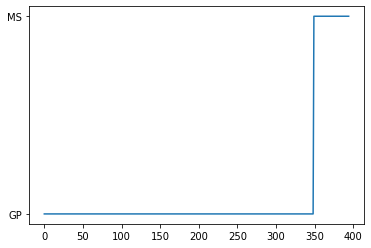

In [152]:
# school tab
print(st.school.nunique())
print(st.school.unique())
plt.plot(st.school)

Столбец school имеет только два значения ['GP' 'MS'], пустых значений нет

In [153]:
# sex tab
print(st.sex.nunique())
print(st.sex.unique())
print(st.sex.value_counts())

2
['F' 'M']
F    208
M    187
Name: sex, dtype: int64


Столбец sex имеет только два значения F, M. Пустых значений нет, девочек немного больше

Количество уникальных значений: 8
Список возможных значений [18 17 15 16 19 22 20 21]
Количество значений
 16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
Гистограмма распределения значений

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64


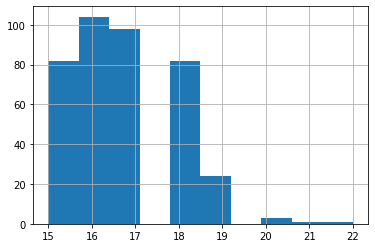

In [154]:
# age tab
first_view('age')

Возможных возрастов - 8, больше всего 16 и 17 летних. Не заполненных значений нет

Количество уникальных значений: 3
Список возможных значений ['U' 'nan' 'R']
Количество значений
 U      295
R       83
nan     17
Name: address, dtype: int64
Гистограмма распределения значений

count     395
unique      3
top         U
freq      295
Name: address, dtype: object


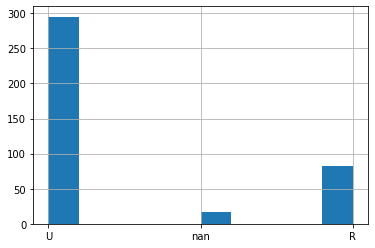

In [155]:
# address tab
st.address = st.address.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
first_view('address')

17 учеников не имеют признака адреса. Заменил на None. Большинство студенов живут в городе

Количество уникальных значений: 3
Список возможных значений [0 2 1]
Количество значений
 2    261
1    107
0     27
Name: famsize, dtype: int64
Гистограмма распределения значений

count    395.000000
mean       1.592405
std        0.615735
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: famsize, dtype: float64


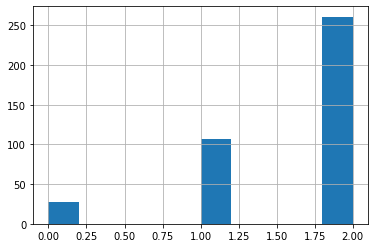

In [156]:
# famsize tab
st.famsize = st.famsize.apply(famsize_fix)
first_view('famsize')

Столбец famsize. Преобразовал в численный. 0 - значение неизвестно, 1 меньше 3 человек, 2 больше трех человек

Количество уникальных значений: 3
Список возможных значений ['A' 'nan' 'T']
Количество значений
 T      314
nan     45
A       36
Name: Pstatus, dtype: int64
Гистограмма распределения значений

count     395
unique      3
top         T
freq      314
Name: Pstatus, dtype: object


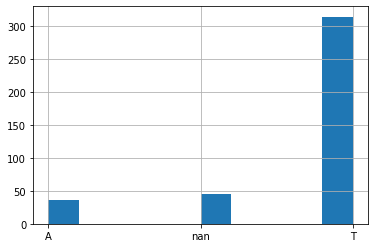

In [157]:
# pstatus tab
st.Pstatus = st.Pstatus.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
first_view('Pstatus')

Большинство студентов живут с родителями. Меньшинство - одни. Много пустых данных, больше чем одиноких студентов

Количество уникальных значений: 5
Список возможных значений [4. 1. 3. 2. 0.]
Количество значений
 4.0    131
2.0    102
3.0    100
1.0     59
0.0      3
Name: Medu, dtype: int64
Гистограмма распределения значений

count    395.000000
mean       2.751899
std        1.094154
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64


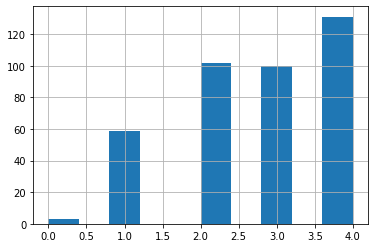

In [158]:
# Medu tab
st.Medu = st.Medu.apply(edu_fix)
first_view('Medu')

Medu преобразовал к числовому типу. Если нет инофрмации об образовании - приравнял к округленному среднему (3)

Количество уникальных значений: 5
Список возможных значений [4. 1. 2. 3. 0.]
Количество значений
 3.0    121
2.0    106
4.0     88
1.0     78
0.0      2
Name: Fedu, dtype: int64
Гистограмма распределения значений

count    395.000000
mean       2.544304
std        1.059133
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64


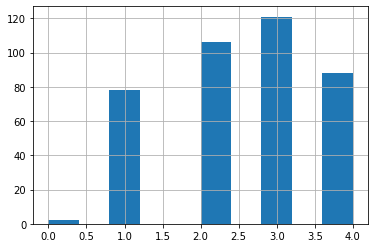

In [159]:
# Fedu tab
st.Fedu = st.Fedu.apply(edu_fix)
first_view('Fedu')

Fedu преобразовал к числовому типу. Если нет инофрмации об образовании - приравнял к округленному среднему (3), один выброс ==40 приравнял к 3

Количество уникальных значений: 5
Список возможных значений ['at_home' 'health' 'other' 'services' 'teacher']
Количество значений
 other       152
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64
Гистограмма распределения значений

count       395
unique        5
top       other
freq        152
Name: Mjob, dtype: object


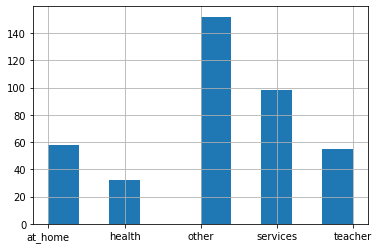

In [160]:
# Mjob tab
st.Mjob = st.Mjob.astype(str).apply(job_fix)
first_view('Mjob')

Mjob убрал NAN, заменив их на other

Количество уникальных значений: 5
Список возможных значений ['teacher' 'other' 'health' 'services' 'at_home']
Количество значений
 other       233
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64
Гистограмма распределения значений

count       395
unique        5
top       other
freq        233
Name: Fjob, dtype: object


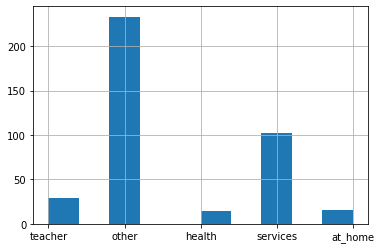

In [161]:
# Fjob tab
st.Fjob = st.Fjob.astype(str).apply(job_fix)
first_view('Fjob')

Fjob убрал NAN, заменив их на other

Количество уникальных значений: 4
Список возможных значений ['course' 'other' 'home' 'reputation']
Количество значений
 course        137
home          104
reputation    103
other          51
Name: reason, dtype: int64
Гистограмма распределения значений

count        395
unique         4
top       course
freq         137
Name: reason, dtype: object


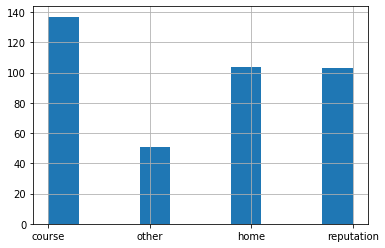

In [162]:
# reason tab
st.reason = st.reason.astype(str).apply(job_fix)
first_view('reason')

reason убрал NAN, заменив их на other. Использовал функцию job_fix, так как логика работы - подходит

Количество уникальных значений: 3
Список возможных значений ['mother' 'father' 'other']
Количество значений
 mother    250
father     86
other      59
Name: guardian, dtype: int64
Гистограмма распределения значений

count        395
unique         3
top       mother
freq         250
Name: guardian, dtype: object


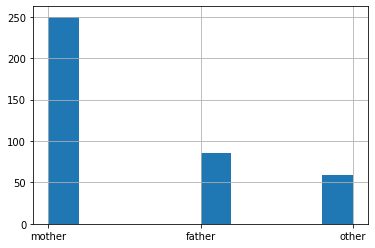

In [163]:
# guardian tab
st.guardian = st.guardian.astype(str).apply(job_fix)
first_view('guardian')

guardian убрал NAN, заменив их на other. Использовал функцию job_fix, так как логика работы - подходит

Количество уникальных значений: 4
Список возможных значений [2. 1. 3. 4.]
Количество значений
 1.0    270
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64
Гистограмма распределения значений

count    395.000000
mean       1.407595
std        0.678490
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64


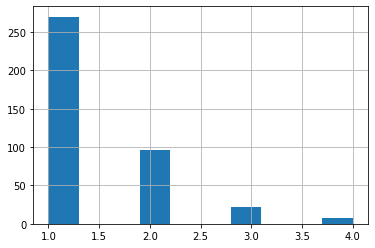

In [164]:
# traveltime tab
st.traveltime = st.traveltime.apply(time_fix, mean=round(st.traveltime.mean()))
first_view('traveltime')

traveltime убрал NAN, заменив их на 1 (mean==1.4).

Количество уникальных значений: 4
Список возможных значений [2. 3. 1. 4.]
Количество значений
 2.0    201
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64
Гистограмма распределения значений

count    395.000000
mean       2.037975
std        0.834580
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64


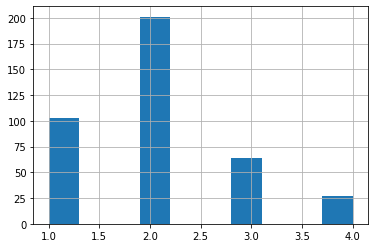

In [165]:
# studytime tab
st.studytime = st.studytime.apply(time_fix, mean=round(st.studytime.mean()))
first_view('studytime')

studytime убрал NAN, заменив их на mean.

Количество уникальных значений: 4
Список возможных значений [0. 3. 2. 1.]
Количество значений
 0.0    315
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64
Гистограмма распределения значений

count    395.000000
mean       0.318987
std        0.726244
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64


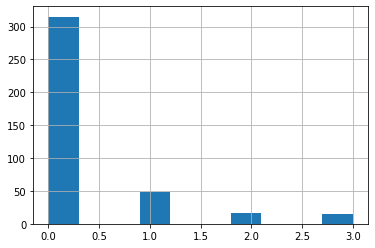

In [166]:
# failures tab
st.failures = st.failures.apply(time_fix, mean=round(st.failures.mean()))
first_view('failures')

failures, убрал nan подставив округленное среднее

Количество уникальных значений: 3
Список возможных значений ['yes' 'no' 'None']
Количество значений
 no      335
yes      51
None      9
Name: schoolsup, dtype: int64
Гистограмма распределения значений

count     395
unique      3
top        no
freq      335
Name: schoolsup, dtype: object


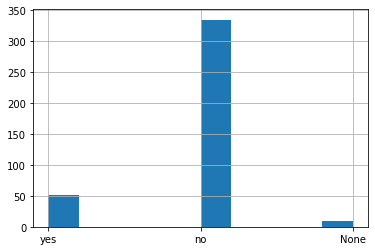

In [167]:
# schoolsup tab
st.schoolsup = st.schoolsup.apply(str_fix, which_fix='None')
first_view('schoolsup')

убрал nan, заменив на 'None'

Количество уникальных значений: 3
Список возможных значений ['no' 'yes' 'None']
Количество значений
 yes     219
no      137
None     39
Name: famsup, dtype: int64
Гистограмма распределения значений

count     395
unique      3
top       yes
freq      219
Name: famsup, dtype: object


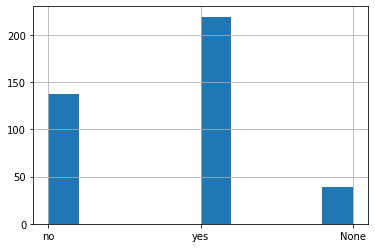

In [168]:
# famsup tab
st.famsup = st.famsup.apply(str_fix, which_fix='None')
first_view('famsup')

убрал nan, заменив на 'None'

Количество уникальных значений: 3
Список возможных значений ['no' 'None' 'yes']
Количество значений
 no      200
yes     155
None     40
Name: paid, dtype: int64
Гистограмма распределения значений

count     395
unique      3
top        no
freq      200
Name: paid, dtype: object


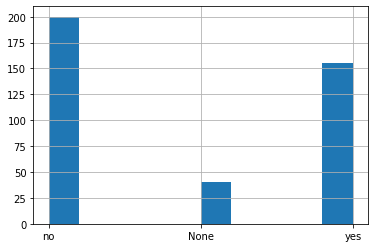

In [169]:
# paid tab
st.paid = st.paid.apply(str_fix, which_fix='None')
first_view('paid')

убрал nan, заменив на 'None'

Количество уникальных значений: 3
Список возможных значений ['no' 'yes' 'None']
Количество значений
 yes     195
no      186
None     14
Name: activities, dtype: int64
Гистограмма распределения значений

count     395
unique      3
top       yes
freq      195
Name: activities, dtype: object


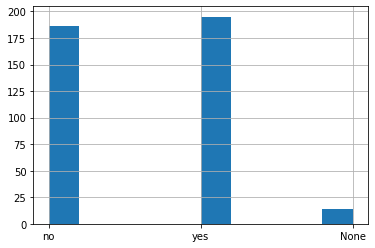

In [170]:
# activities tab
st.activities = st.activities.apply(str_fix, which_fix='None')
first_view('activities')

убрал nan, заменив на 'None'

Количество уникальных значений: 3
Список возможных значений ['yes' 'no' 'None']
Количество значений
 yes     300
no       79
None     16
Name: nursery, dtype: int64
Гистограмма распределения значений

count     395
unique      3
top       yes
freq      300
Name: nursery, dtype: object


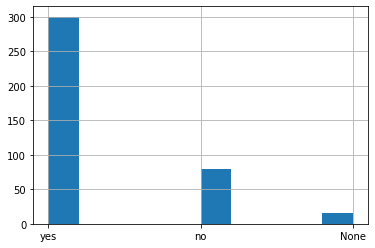

In [171]:
# nursery tab
st.nursery = st.nursery.apply(str_fix, which_fix='None')
first_view('nursery')

убрал nan, заменив на 'None'

Количество уникальных значений: 3
Список возможных значений ['yes' 'None' 'no']
Количество значений
 yes     356
None     20
no       19
Name: higher, dtype: int64
Гистограмма распределения значений

count     395
unique      3
top       yes
freq      356
Name: higher, dtype: object


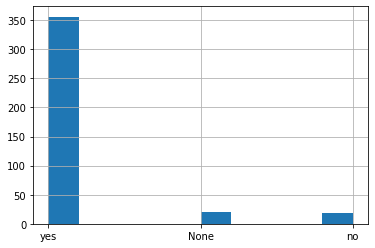

In [172]:
# higher tab
st.higher = st.higher.apply(str_fix, which_fix='None')
first_view('higher')

убрал nan, заменив на 'None'

Количество уникальных значений: 3
Список возможных значений ['None' 'yes' 'no']
Количество значений
 yes     305
no       56
None     34
Name: internet, dtype: int64
Гистограмма распределения значений

count     395
unique      3
top       yes
freq      305
Name: internet, dtype: object


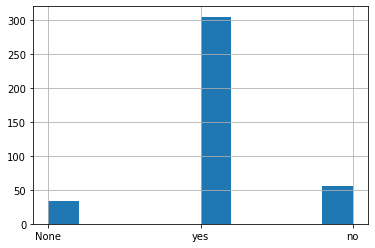

In [173]:
# internet tab
st.internet = st.internet.apply(str_fix, which_fix='None')
first_view('internet')

убрал nan, заменив на 'None'

Количество уникальных значений: 3
Список возможных значений ['no' 'None' 'yes']
Количество значений
 no      240
yes     124
None     31
Name: romantic, dtype: int64
Гистограмма распределения значений

count     395
unique      3
top        no
freq      240
Name: romantic, dtype: object


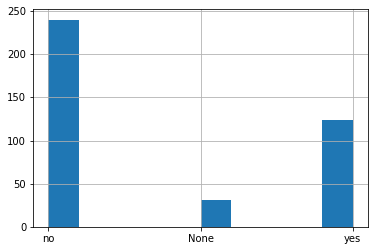

In [174]:
# romantic tab
st.romantic = st.romantic.apply(str_fix, which_fix='None')
first_view('romantic')

убрал nan, заменив на 'None'

Количество уникальных значений: 5
Список возможных значений [4. 5. 3. 2. 1.]
Количество значений
 4.0    210
5.0     99
3.0     62
2.0     17
1.0      7
Name: famrel, dtype: int64
Гистограмма распределения значений

count    395.000000
mean       3.954430
std        0.859671
min        1.000000
25%        4.000000
50%        4.000000
75%        4.500000
max        5.000000
Name: famrel, dtype: float64


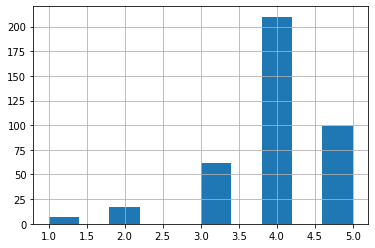

In [175]:
# famrel tab
st.famrel = st.famrel.apply(
    five_point_gr_fix, which_fix=round(st.famrel.median()))
first_view('famrel')

убрал NaN, -1 заменив медианным значением

Количество уникальных значений: 5
Список возможных значений [3. 2. 4. 1. 5.]
Количество значений
 3.0    164
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64
Гистограмма распределения значений

count    395.000000
mean       3.225316
std        0.980711
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64


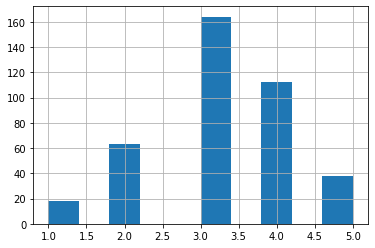

In [176]:
# freetime tab
st.freetime = st.freetime.apply(
    five_point_gr_fix, which_fix=round(st.freetime.median()))
first_view('freetime')

убрал NaN заменив медианным значением

Количество уникальных значений: 5
Список возможных значений [4. 3. 2. 1. 5.]
Количество значений
 3.0    135
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64
Гистограмма распределения значений

count    395.000000
mean       3.103797
std        1.104610
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64


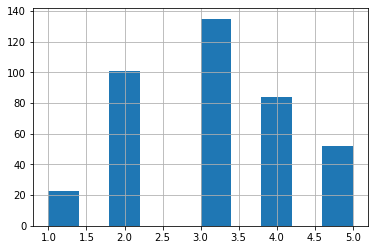

In [177]:
# goout tab
st.goout = st.goout.apply(
    five_point_gr_fix, which_fix=round(st.goout.median()))
first_view('goout')

убрал NaN заменив медианным значением

Количество уникальных значений: 5
Список возможных значений [3. 5. 1. 2. 4.]
Количество значений
 5.0    138
3.0     89
4.0     78
1.0     47
2.0     43
Name: health, dtype: int64
Гистограмма распределения значений

count    395.000000
mean       3.549367
std        1.372118
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64


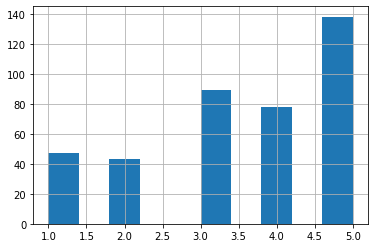

In [178]:
# health tab
st.health = st.health.apply(
    five_point_gr_fix, which_fix=round(st.health.median()))
first_view('health')

убрал NaN заменив медианным значением

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].
Количество уникальных значений: 21
Список возможных значений [ 6.  4. 10.  2.  0. 16. 14.  7.  8. 12. 18. 20.  5. 13. 15.  3.  1. 19.
  9. 11. 17.]
Количество значений
 0.0     111
2.0      60
4.0      53
6.0      31
8.0      21
10.0     17
12.0     12
14.0     12
3.0       8
16.0      7
7.0       6
18.0      5
5.0       5
20.0      4
1.0       3
9.0       3
11.0      2
13.0      2
15.0      2
19.0      1
17.0      1
Name: absences, dtype: int64
Гистограмма распределения значений

count    366.000000
mean       4.603825
std        4.965512
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       20.000000
Name: absences, dtype: float64


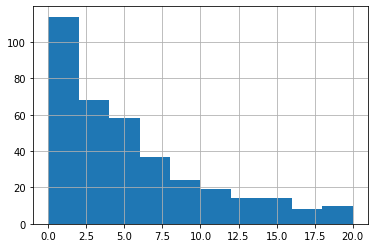

In [179]:
# absences tab

median = st.absences.median()
IQR = st.absences.quantile(0.75) - st.absences.quantile(0.25)
perc25 = st.absences.quantile(0.25)
perc75 = st.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
# st.absences.loc[st.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10),
#                                                                                             label = 'IQR')
# plt.legend();

st = st.loc[st.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

first_view('absences')

Количество уникальных значений: 17
Список возможных значений [ 30.  50.  75.  55.  95.  45.  60.  70.  80.  25.  40.  85.  90.  65.
 100.  35.   0.]
Количество значений
 50.0     53
55.0     42
0.0      36
75.0     31
65.0     30
60.0     29
70.0     27
40.0     26
45.0     23
80.0     16
30.0     14
35.0      9
90.0      9
25.0      7
95.0      5
85.0      3
100.0     1
Name: score, dtype: int64
Гистограмма распределения значений

count    361.000000
mean      51.994460
std       22.956117
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64


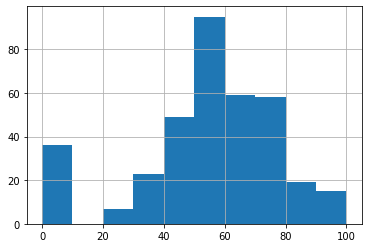

In [180]:
# score tab
st = st.loc[st.score == st.score]
first_view('score')

## предварительная обработка данных по каждому столбцу завершена

## Корреляционный анализ

In [181]:
#sns.pairplot(st, kind = 'reg')

,age,famsize,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.010596,-0.164165,-0.164119,0.074644,0.000437,0.183789,-0.000417,0.048036,0.039860,0.127456,-0.061210,0.155469,-0.159306
famsize,-0.010596,1.000000,0.069686,0.131549,-0.072107,0.063470,-0.010564,-0.064179,0.018363,-0.040551,0.048260,0.013523,-0.061853,-0.023083
Medu,-0.164165,0.069686,1.000000,0.608359,-0.174956,0.086452,-0.237911,-0.086878,-0.018612,0.041658,0.057665,-0.061533,0.066077,0.206390
Fedu,-0.164119,0.131549,0.608359,1.000000,-0.137970,0.012421,-0.268039,-0.012117,-0.029012,0.000567,0.042221,0.017353,-0.018763,0.107796
traveltime,0.074644,-0.072107,-0.174956,-0.137970,1.000000,-0.089327,0.048122,0.090184,-0.038504,-0.001768,0.037365,-0.024479,-0.040038,-0.059351
studytime,0.000437,0.063470,0.086452,0.012421,-0.089327,1.000000,-0.166219,-1.000000,0.017464,-0.137636,-0.036629,-0.082885,-0.075256,0.112166
failures,0.183789,-0.010564,-0.237911,-0.268039,0.048122,-0.166219,1.000000,0.167612,0.014277,0.081866,0.073092,0.094170,0.081094,-0.322940
"studytime, granular",-0.000417,-0.064179,-0.086878,-0.012117,0.090184,-1.000000,0.167612,1.000000,-0.017780,0.139491,0.037030,0.083571,0.075454,-0.113113
famrel,0.048036,0.018363,-0.018612,-0.029012,-0.038504,0.017464,0.014277,-0.017780,1.000000,0.159221,0.076054,0.093837,-0.070825,0.054753
freetime,0.039860,-0.040551,0.041658,0.000567,-0.001768,-0.137636,0.081866,0.139491,0.159221,1.000000,0.286151,0.042130,0.091072,0.032556


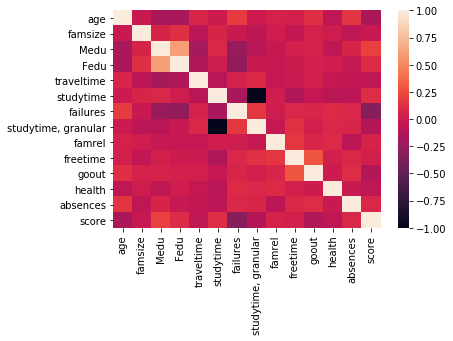

In [182]:
# корреляционный анализ
display(st.corr())
cr = st.corr()
sns.heatmap(cr)

studytime_granular можно удалить, коэффициент корреляции -1 с studytime.

In [183]:
st.drop(['studytime, granular'], inplace=True, axis=1)
display(st.head(3))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,0,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,2,nan,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,1,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0


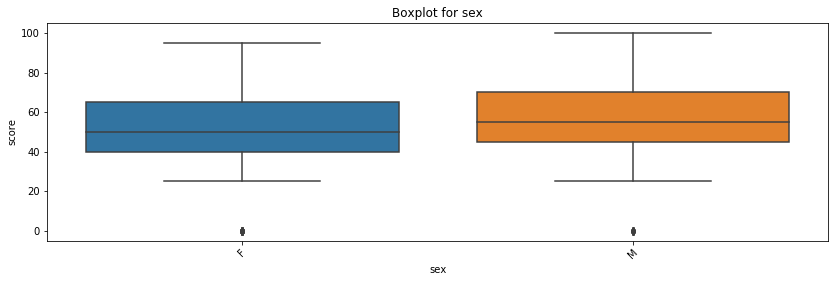

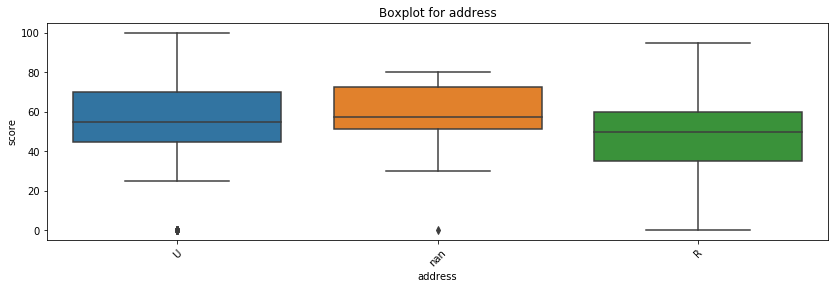

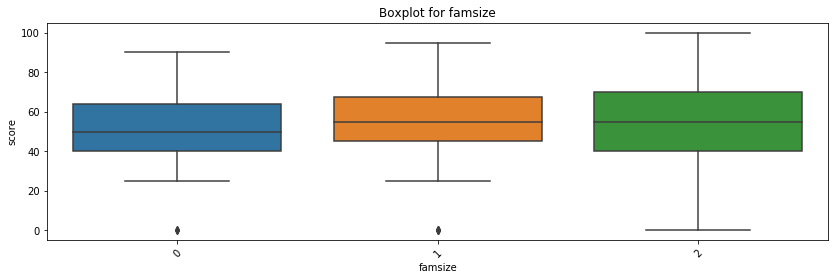

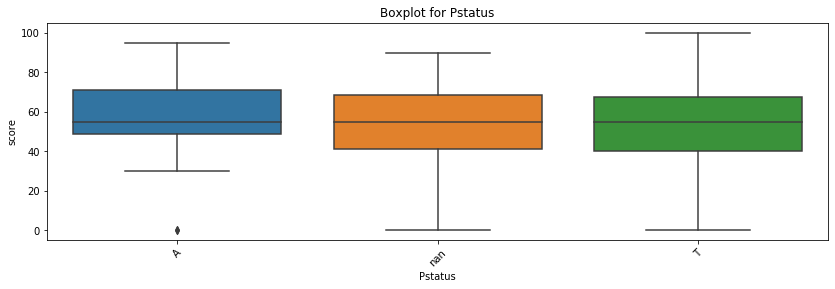

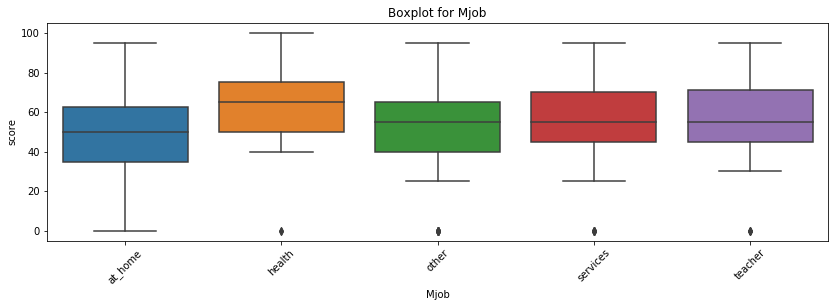

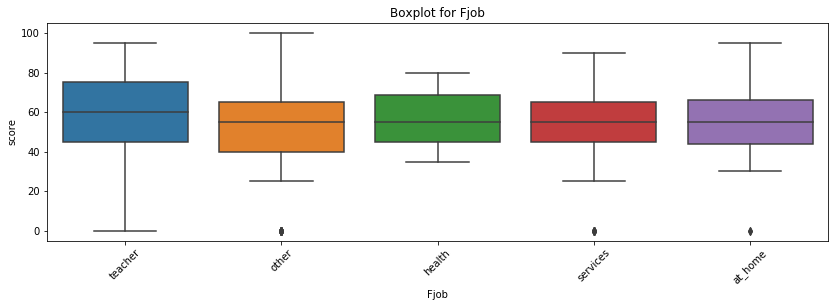

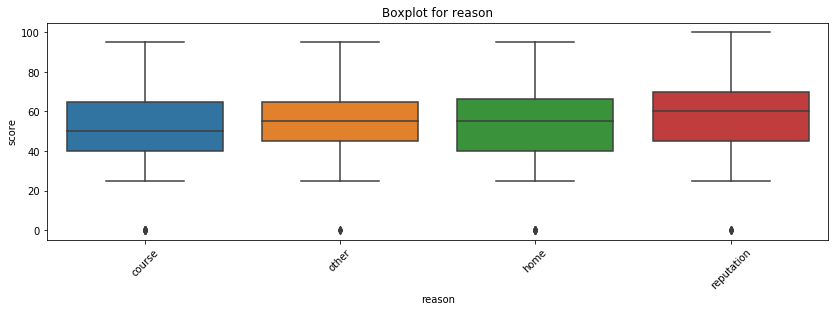

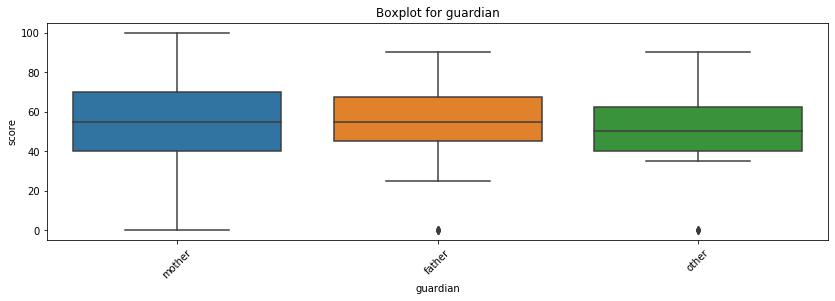

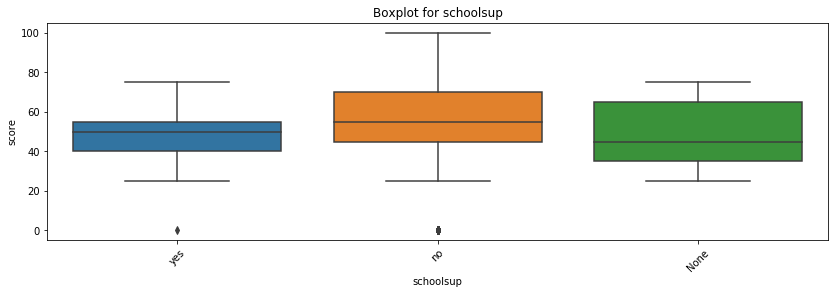

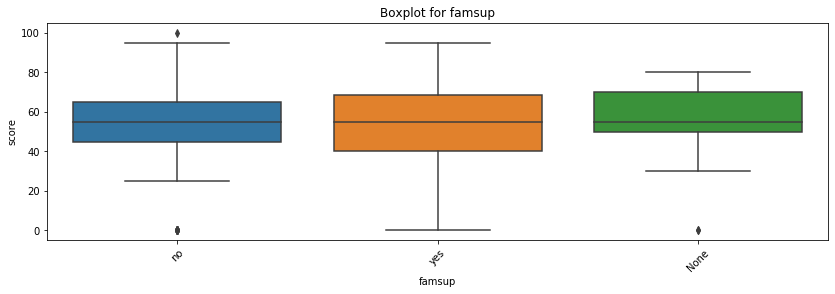

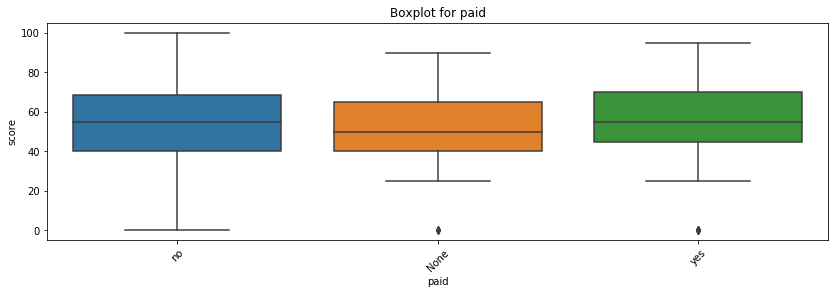

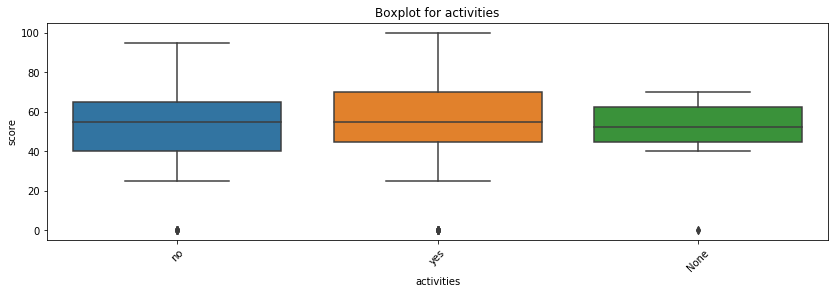

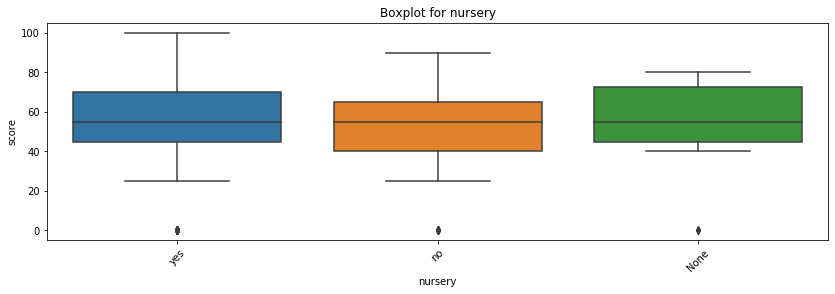

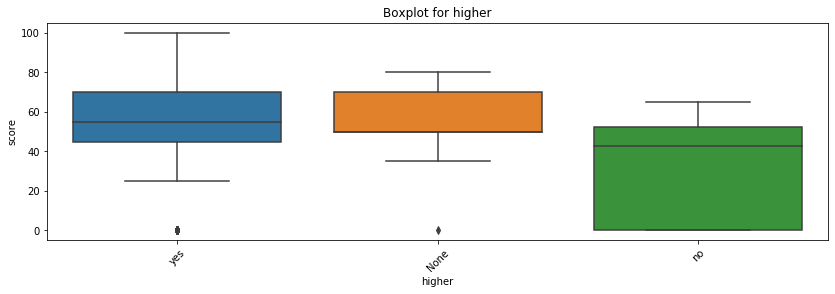

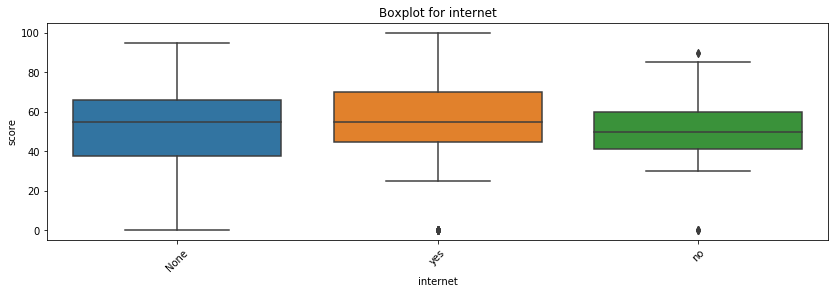

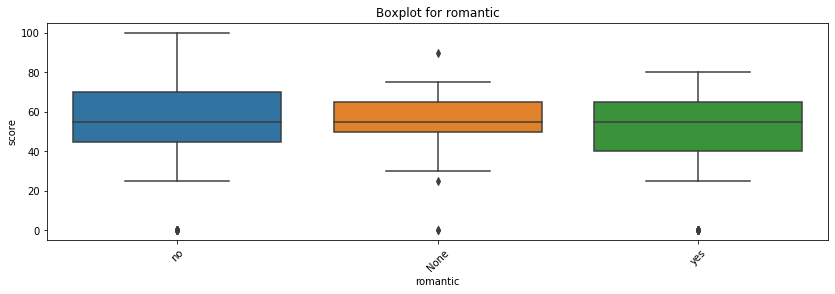

In [184]:
# номинативные переменные, влияние на score
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=st.loc[st.loc[:, column].isin(
                    st.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


for col in ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

Анализ с помощью boxplot показал, что переменные:
- Pstatus
- famsup
- activities
- nursery
- romantic
не влияют на значение scores, соответетсвенно могут быть исключены при построении модели

In [188]:
def get_stat_dif(column):
    cols = st.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(st.loc[st.loc[:, column] == comb[0], 'score'],
                     st.loc[st.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


for col in ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

st.drop(['famsize', 'Pstatus', 'Fjob', 'reason', 'guardian', 'schoolsup',
            'famsup', 'paid', 'activities', 'nursery', 'internet'], inplace=True, axis=1)
display(st.head(3))

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


,school,sex,age,address,Medu,Fedu,Mjob,traveltime,studytime,failures,higher,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,4.0,4.0,at_home,2.0,2.0,0.0,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,1.0,1.0,at_home,1.0,2.0,0.0,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,1.0,1.0,at_home,1.0,2.0,3.0,yes,None,4.0,3.0,2.0,3.0,10.0,50.0


### Выводы

1. Проведена первичная обработка данных. Большинство строк удалось сохранить, заменив отсутствующие значения средним или медианным значениями.
2. Выбросы и очевидно неверные значения были обработаны
3. Корреляционный анализ показал, что имеющиеся числовые столбцы слабо коррелируют друг с другом, следовательно все данные можно использовать для построения модели. Возможно, можно использовать одно из двух значений Fedu или Medu, так как коэффициент корреляции составляет 0.6. Кроме того, не документированный столбец granular по модулю имеет полную корреляцию с studytime, соответственно может быть удален из модели.
4. Анализ номинативных переменных показал значимость стобцов sex, address, Mjob, higher, romantic. Остальные при построении модели можно исключить.

